In [1]:
import logging

import probtorch
import torch

import combinators
import importance
import mcmc
import ssm
import trace_tries
import utils

In [2]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [3]:
mu = torch.zeros(1)
sigma = torch.ones(1) / 2
delta = torch.ones(1)
zs = torch.ones(50+1) * -1
zs[0] = 0

In [4]:
ssm_step = combinators.PrimitiveCall(ssm.ssm_step)
ssm_initializer = combinators.ReturnModel(zs[0], mu, sigma, delta)
ssm_sequence = combinators.Reduce(ssm_step, generator=lambda: range(zs.shape[0]-1), initializer=ssm_initializer)

In [5]:
_, generative = ssm_sequence()

In [6]:
data = {k.rpartition('/')[-1]: rv.value for (k, rv) in generative.filter(lambda k, rv: 'X_' in k)}

In [7]:
particle_shape = (100,)

In [8]:
ssm_params = {
    'mu': {
        'loc': torch.tensor(0.),
        'scale': torch.tensor(0.25),
    },
    'sigma': {
        'loc': torch.tensor(1.),
        'scale': torch.tensor(0.25),
    },
    'delta': {
        'loc': torch.tensor(0.),
        'scale': torch.tensor(0.25),
    }
}

In [9]:
init_ssm_generative = combinators.HyperPopulation(ssm.init_ssm, particle_shape, hyper=ssm_params)
ssm_step_generative = combinators.PrimitiveCall(ssm.ssm_step)
ssm_generative = combinators.Reduce(ssm_step_generative, generator=lambda: range(50), initializer=init_ssm_generative)

In [10]:
init_ssm_proposal = combinators.HyperPopulation(ssm.init_ssm, particle_shape, trainable=ssm_params)
ssm_step_proposal = combinators.PrimitiveCall(ssm.ssm_step)
ssm_proposal = combinators.Reduce(ssm_step_proposal, generator=lambda: range(50), initializer=init_ssm_proposal)

In [11]:
ssm_training = combinators.score_under_proposal(ssm_proposal, ssm_generative)

In [12]:
inference, init_ssm_params, elbos = importance.variational_importance(
    ssm_training, 1000, data, use_cuda=False,
    lr=1e-2, patience=100
)

12/29/2018 23:05:33 ELBO=-1.59299915e+03 at epoch 1
12/29/2018 23:05:33 ELBO=-1.11454382e+03 at epoch 2
12/29/2018 23:05:33 ELBO=-1.75894348e+03 at epoch 3
12/29/2018 23:05:33 ELBO=-3.77721954e+02 at epoch 4
12/29/2018 23:05:34 ELBO=-8.10649475e+02 at epoch 5
12/29/2018 23:05:34 ELBO=-7.13230713e+02 at epoch 6
12/29/2018 23:05:34 ELBO=-3.91582397e+02 at epoch 7
12/29/2018 23:05:34 ELBO=-3.43677856e+02 at epoch 8
12/29/2018 23:05:34 ELBO=-4.36160156e+02 at epoch 9
12/29/2018 23:05:34 ELBO=-4.31722260e+02 at epoch 10
12/29/2018 23:05:34 ELBO=-1.88590515e+02 at epoch 11
12/29/2018 23:05:34 ELBO=-2.10242828e+02 at epoch 12
12/29/2018 23:05:34 ELBO=-5.72952271e+02 at epoch 13
12/29/2018 23:05:34 ELBO=-2.97369202e+02 at epoch 14
12/29/2018 23:05:34 ELBO=-3.44341492e+02 at epoch 15
12/29/2018 23:05:34 ELBO=-1.49010040e+02 at epoch 16
12/29/2018 23:05:34 ELBO=-2.67252258e+02 at epoch 17
12/29/2018 23:05:34 ELBO=-5.12600769e+02 at epoch 18
12/29/2018 23:05:34 ELBO=-4.20181366e+02 at epoch 19
12

Epoch   280: reducing learning rate of group 0 to 5.0000e-03.


12/29/2018 23:05:50 ELBO=-1.70780365e+02 at epoch 285
12/29/2018 23:05:50 ELBO=-1.42787506e+02 at epoch 286
12/29/2018 23:05:50 ELBO=-1.31976761e+02 at epoch 287
12/29/2018 23:05:50 ELBO=-1.48629395e+02 at epoch 288
12/29/2018 23:05:50 ELBO=-3.63649963e+02 at epoch 289
12/29/2018 23:05:50 ELBO=-1.86550812e+02 at epoch 290
12/29/2018 23:05:50 ELBO=-1.90811584e+02 at epoch 291
12/29/2018 23:05:50 ELBO=-1.66991180e+02 at epoch 292
12/29/2018 23:05:50 ELBO=-1.26837578e+02 at epoch 293
12/29/2018 23:05:50 ELBO=-1.50498413e+02 at epoch 294
12/29/2018 23:05:50 ELBO=-2.78936646e+02 at epoch 295
12/29/2018 23:05:50 ELBO=-2.96698547e+02 at epoch 296
12/29/2018 23:05:50 ELBO=-1.69319183e+02 at epoch 297
12/29/2018 23:05:51 ELBO=-2.06163605e+02 at epoch 298
12/29/2018 23:05:51 ELBO=-1.78597931e+02 at epoch 299
12/29/2018 23:05:51 ELBO=-2.17625351e+02 at epoch 300
12/29/2018 23:05:51 ELBO=-1.99339767e+02 at epoch 301
12/29/2018 23:05:51 ELBO=-2.20899841e+02 at epoch 302
12/29/2018 23:05:51 ELBO=-1.

Epoch   496: reducing learning rate of group 0 to 2.5000e-03.


12/29/2018 23:06:04 ELBO=-1.64432068e+02 at epoch 501
12/29/2018 23:06:04 ELBO=-2.34146332e+02 at epoch 502
12/29/2018 23:06:04 ELBO=-2.46247650e+02 at epoch 503
12/29/2018 23:06:04 ELBO=-2.10056961e+02 at epoch 504
12/29/2018 23:06:04 ELBO=-2.85784363e+02 at epoch 505
12/29/2018 23:06:04 ELBO=-2.64954468e+02 at epoch 506
12/29/2018 23:06:04 ELBO=-1.51467514e+02 at epoch 507
12/29/2018 23:06:04 ELBO=-1.84980560e+02 at epoch 508
12/29/2018 23:06:04 ELBO=-1.92479218e+02 at epoch 509
12/29/2018 23:06:04 ELBO=-1.95244568e+02 at epoch 510
12/29/2018 23:06:04 ELBO=-2.39729248e+02 at epoch 511
12/29/2018 23:06:04 ELBO=-2.73714539e+02 at epoch 512
12/29/2018 23:06:04 ELBO=-1.79564255e+02 at epoch 513
12/29/2018 23:06:04 ELBO=-2.00024902e+02 at epoch 514
12/29/2018 23:06:05 ELBO=-1.65667221e+02 at epoch 515
12/29/2018 23:06:05 ELBO=-1.98277954e+02 at epoch 516
12/29/2018 23:06:05 ELBO=-2.90046265e+02 at epoch 517
12/29/2018 23:06:05 ELBO=-1.50213501e+02 at epoch 518
12/29/2018 23:06:05 ELBO=-1.

Epoch   597: reducing learning rate of group 0 to 1.2500e-03.


12/29/2018 23:06:10 ELBO=-1.70627106e+02 at epoch 602
12/29/2018 23:06:10 ELBO=-1.41367477e+02 at epoch 603
12/29/2018 23:06:10 ELBO=-1.78954163e+02 at epoch 604
12/29/2018 23:06:11 ELBO=-1.78815323e+02 at epoch 605
12/29/2018 23:06:11 ELBO=-1.57390091e+02 at epoch 606
12/29/2018 23:06:11 ELBO=-1.66125916e+02 at epoch 607
12/29/2018 23:06:11 ELBO=-1.84426239e+02 at epoch 608
12/29/2018 23:06:11 ELBO=-2.07484436e+02 at epoch 609
12/29/2018 23:06:11 ELBO=-3.79367401e+02 at epoch 610
12/29/2018 23:06:11 ELBO=-2.00802139e+02 at epoch 611
12/29/2018 23:06:11 ELBO=-1.89924042e+02 at epoch 612
12/29/2018 23:06:11 ELBO=-3.39062988e+02 at epoch 613
12/29/2018 23:06:11 ELBO=-1.40943085e+02 at epoch 614
12/29/2018 23:06:11 ELBO=-2.39606476e+02 at epoch 615
12/29/2018 23:06:11 ELBO=-2.36343842e+02 at epoch 616
12/29/2018 23:06:11 ELBO=-2.03024963e+02 at epoch 617
12/29/2018 23:06:11 ELBO=-2.25138824e+02 at epoch 618
12/29/2018 23:06:11 ELBO=-1.71661392e+02 at epoch 619
12/29/2018 23:06:11 ELBO=-2.

Epoch   698: reducing learning rate of group 0 to 6.2500e-04.


12/29/2018 23:06:17 ELBO=-1.27173279e+02 at epoch 702
12/29/2018 23:06:17 ELBO=-1.12155724e+02 at epoch 703
12/29/2018 23:06:17 ELBO=-1.91757584e+02 at epoch 704
12/29/2018 23:06:17 ELBO=-1.60054886e+02 at epoch 705
12/29/2018 23:06:17 ELBO=-1.74724136e+02 at epoch 706
12/29/2018 23:06:17 ELBO=-1.81660049e+02 at epoch 707
12/29/2018 23:06:17 ELBO=-2.24404404e+02 at epoch 708
12/29/2018 23:06:17 ELBO=-2.21091003e+02 at epoch 709
12/29/2018 23:06:18 ELBO=-1.78523163e+02 at epoch 710
12/29/2018 23:06:18 ELBO=-1.82371292e+02 at epoch 711
12/29/2018 23:06:18 ELBO=-2.45216461e+02 at epoch 712
12/29/2018 23:06:18 ELBO=-1.54455536e+02 at epoch 713
12/29/2018 23:06:18 ELBO=-2.30739243e+02 at epoch 714
12/29/2018 23:06:18 ELBO=-1.72182602e+02 at epoch 715
12/29/2018 23:06:18 ELBO=-1.32596664e+02 at epoch 716
12/29/2018 23:06:18 ELBO=-1.68947418e+02 at epoch 717
12/29/2018 23:06:18 ELBO=-2.05204178e+02 at epoch 718
12/29/2018 23:06:18 ELBO=-2.08854095e+02 at epoch 719
12/29/2018 23:06:18 ELBO=-2.

Epoch   844: reducing learning rate of group 0 to 3.1250e-04.


12/29/2018 23:06:27 ELBO=-2.34948883e+02 at epoch 849
12/29/2018 23:06:27 ELBO=-1.47237701e+02 at epoch 850
12/29/2018 23:06:27 ELBO=-1.91853546e+02 at epoch 851
12/29/2018 23:06:27 ELBO=-1.55329071e+02 at epoch 852
12/29/2018 23:06:27 ELBO=-2.56197998e+02 at epoch 853
12/29/2018 23:06:27 ELBO=-1.94203506e+02 at epoch 854
12/29/2018 23:06:27 ELBO=-1.50352386e+02 at epoch 855
12/29/2018 23:06:27 ELBO=-1.74265961e+02 at epoch 856
12/29/2018 23:06:27 ELBO=-1.78696472e+02 at epoch 857
12/29/2018 23:06:27 ELBO=-3.33548737e+02 at epoch 858
12/29/2018 23:06:27 ELBO=-2.17393265e+02 at epoch 859
12/29/2018 23:06:28 ELBO=-3.33310242e+02 at epoch 860
12/29/2018 23:06:28 ELBO=-1.49768951e+02 at epoch 861
12/29/2018 23:06:28 ELBO=-2.10497238e+02 at epoch 862
12/29/2018 23:06:28 ELBO=-1.42127930e+02 at epoch 863
12/29/2018 23:06:28 ELBO=-1.56434067e+02 at epoch 864
12/29/2018 23:06:28 ELBO=-2.38594894e+02 at epoch 865
12/29/2018 23:06:28 ELBO=-2.72347595e+02 at epoch 866
12/29/2018 23:06:28 ELBO=-1.

Epoch   945: reducing learning rate of group 0 to 1.5625e-04.


12/29/2018 23:06:33 ELBO=-1.69560150e+02 at epoch 950
12/29/2018 23:06:34 ELBO=-1.77917618e+02 at epoch 951
12/29/2018 23:06:34 ELBO=-1.84074753e+02 at epoch 952
12/29/2018 23:06:34 ELBO=-1.53295563e+02 at epoch 953
12/29/2018 23:06:34 ELBO=-1.47164139e+02 at epoch 954
12/29/2018 23:06:34 ELBO=-1.80363007e+02 at epoch 955
12/29/2018 23:06:34 ELBO=-1.68311951e+02 at epoch 956
12/29/2018 23:06:34 ELBO=-2.32874283e+02 at epoch 957
12/29/2018 23:06:34 ELBO=-1.61369904e+02 at epoch 958
12/29/2018 23:06:34 ELBO=-2.93682220e+02 at epoch 959
12/29/2018 23:06:34 ELBO=-2.76153625e+02 at epoch 960
12/29/2018 23:06:34 ELBO=-1.31269836e+02 at epoch 961
12/29/2018 23:06:34 ELBO=-1.69783493e+02 at epoch 962
12/29/2018 23:06:34 ELBO=-1.83092010e+02 at epoch 963
12/29/2018 23:06:34 ELBO=-1.87159515e+02 at epoch 964
12/29/2018 23:06:35 ELBO=-1.09436371e+02 at epoch 965
12/29/2018 23:06:35 ELBO=-1.71167465e+02 at epoch 966
12/29/2018 23:06:35 ELBO=-2.55922607e+02 at epoch 967
12/29/2018 23:06:35 ELBO=-2.

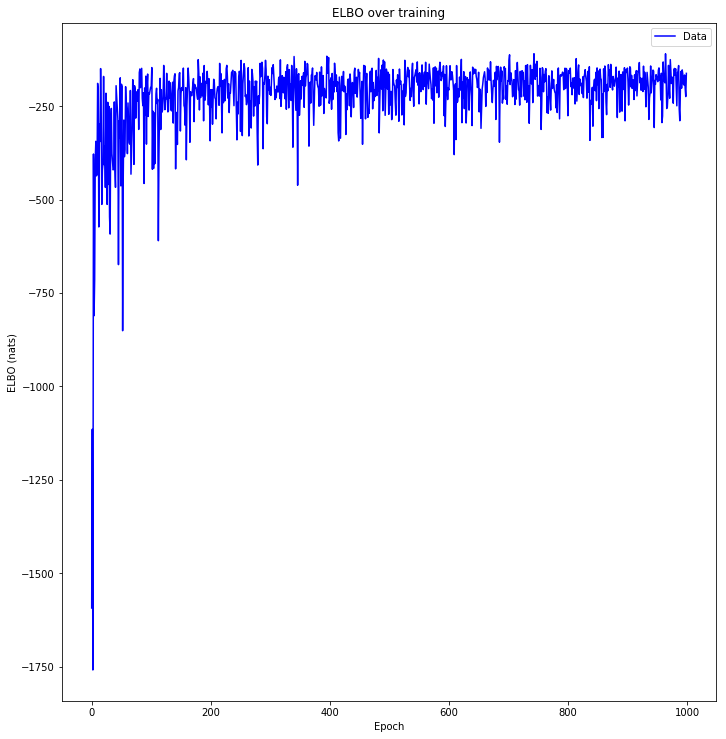

In [13]:
utils.plot_evidence_bounds(elbos)

In [14]:
ssm_smc = importance.smc(ssm_step_proposal, particle_shape, lambda: range(50), initializer=init_ssm_proposal)
ssm_score = combinators.score_under_proposal(ssm_smc, ssm_generative)

In [15]:
_, inference = ssm_score(data=data)

In [16]:
for t in range(1, zs.shape[0]):
    key = generative.find(lambda k, v: ('Z_%d' % t) in k)[0]
    accuracy = ((inference[key].value - utils.optional_to(generative[key], inference[key].value))**2).mean()
    print('SMC MSE at time %d: %f' % (t, accuracy))

SMC MSE at time 1: 0.579997
SMC MSE at time 2: 0.803668
SMC MSE at time 3: 0.546958
SMC MSE at time 4: 0.787404
SMC MSE at time 5: 0.707505
SMC MSE at time 6: 0.627120
SMC MSE at time 7: 0.463897
SMC MSE at time 8: 0.684289
SMC MSE at time 9: 0.460825
SMC MSE at time 10: 1.024963
SMC MSE at time 11: 1.482408
SMC MSE at time 12: 0.544907
SMC MSE at time 13: 0.872624
SMC MSE at time 14: 1.468151
SMC MSE at time 15: 0.457002
SMC MSE at time 16: 2.343904
SMC MSE at time 17: 1.210766
SMC MSE at time 18: 0.330071
SMC MSE at time 19: 0.455094
SMC MSE at time 20: 0.588173
SMC MSE at time 21: 0.656532
SMC MSE at time 22: 3.366922
SMC MSE at time 23: 0.571326
SMC MSE at time 24: 0.662931
SMC MSE at time 25: 0.739227
SMC MSE at time 26: 0.885609
SMC MSE at time 27: 0.498434
SMC MSE at time 28: 0.548728
SMC MSE at time 29: 0.731107
SMC MSE at time 30: 0.791129
SMC MSE at time 31: 0.622359
SMC MSE at time 32: 0.905020
SMC MSE at time 33: 3.059948
SMC MSE at time 34: 1.388815
SMC MSE at time 35: 0.9

In [17]:
particle_mh = mcmc.LightweightMH(ssm_score, moves=100)

In [18]:
lookup = utils.dict_lookup(data)
samples, inference = particle_mh(data=data, trace=inference)

In [19]:
inference

In [20]:
generative

In [21]:
for t in range(1, zs.shape[0]):
    key = generative.find(lambda k, v: ('Z_%d' % t) in k)[0]
    accuracy = ((inference[key].value - utils.optional_to(generative[key], inference[key].value))**2).mean()
    print('SMC MSE at time %d: %f' % (t, accuracy))

SMC MSE at time 1: 1.300571
SMC MSE at time 2: 1.106128
SMC MSE at time 3: 0.116434
SMC MSE at time 4: 2.138554
SMC MSE at time 5: 2.545954
SMC MSE at time 6: 2.513580
SMC MSE at time 7: 0.668335
SMC MSE at time 8: 1.127218
SMC MSE at time 9: 0.019557
SMC MSE at time 10: 0.000439
SMC MSE at time 11: 2.270260
SMC MSE at time 12: 0.546237
SMC MSE at time 13: 1.406004
SMC MSE at time 14: 1.786455
SMC MSE at time 15: 0.910330
SMC MSE at time 16: 2.965907
SMC MSE at time 17: 5.313470
SMC MSE at time 18: 0.874493
SMC MSE at time 19: 0.839055
SMC MSE at time 20: 0.425343
SMC MSE at time 21: 1.159715
SMC MSE at time 22: 0.185981
SMC MSE at time 23: 0.000014
SMC MSE at time 24: 0.060786
SMC MSE at time 25: 2.163188
SMC MSE at time 26: 7.939215
SMC MSE at time 27: 4.971205
SMC MSE at time 28: 2.167138
SMC MSE at time 29: 0.188368
SMC MSE at time 30: 0.286183
SMC MSE at time 31: 0.592789
SMC MSE at time 32: 0.833008
SMC MSE at time 33: 6.863474
SMC MSE at time 34: 2.297079
SMC MSE at time 35: 2.5

In [22]:
init_ssm_params

"{'first.initializer.delta__loc': 'tensor(0.3574)', 'first.initializer.delta__scale': 'tensor(0.4664)', 'first.initializer.mu__loc': 'tensor(-0.1547)', 'first.initializer.mu__scale': 'tensor(0.2704)', 'first.initializer.sigma__loc': 'tensor(0.3203)', 'first.initializer.sigma__scale': 'tensor(0.2838)', 'second.sampler.initializer.delta__loc': 'tensor(0.)', 'second.sampler.initializer.delta__scale': 'tensor(0.2500)', 'second.sampler.initializer.mu__loc': 'tensor(0.)', 'second.sampler.initializer.mu__scale': 'tensor(0.2500)', 'second.sampler.initializer.sigma__loc': 'tensor(1.)', 'second.sampler.initializer.sigma__scale': 'tensor(0.2500)'}"